# INTRO TO PYTHON - TAKE HOME EXAM

In [457]:
import IPython
from ipywidgets import AppLayout
from ipywidgets import widgets
from ipywidgets import TwoByTwoLayout

In [458]:
out = widgets.Output(layout={'border': '1px solid cyan'})
out

Output(layout=Layout(border='1px solid cyan'))

In [459]:
name=input("Enter your name: ")

with out:
  print('Hello ', name, "!")
  print(' ')
  print('This app was authored by:')
  print('- Giulia Webers (i6272810)')
  print('- Joelle Mona (istudentID)')

Enter your name: hh


In [460]:
from IPython.display import Image

url='https://img.freepik.com/premium-vector/coder-developer-concentrated-working-project-developing-programming-coding-technologies_569013-336.jpg'
image = IPython.display.Image(url, width = 300)
center_output=widgets.Image(
  value=image.data,
  format='jpg', 
  width=300,
  height=400,
)

AppLayout(center=center_output)

AppLayout(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb…

#1. INTRODUCTION

For this take home exam, the "Worldwide covid data" dataset was examined. 

This notebook will analyze whether covid vaccinations significantly helped curbe the progression of the covid-19 pandemic in (insert continent). 

This will be done by firstly analyzing the progression of the vaccination count. Then, the effect of increasing vaccinations on the number of covid cases will be explored. Additionally, the potential correlation between the number of covid vaccins, number of covid cases and number of death casesa will be analyzed.


# **RESEARCH QUESTION**
## *Did the vaccinations against covid significantly curbe the progression of the covid-19 pandemic in North America?*

STEP OF ANALYSIS

> Progression of the vaccination count


> What was the effect of vaccines on covid cases?


> What was the effect of vaccines on the cases of death?



# 2. DATA PREPARATION

LOADING THE DATASET

In [461]:
import pandas as pd
import numpy as np
import datetime

covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", parse_dates=['date'])
covid.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(262199, 67)

The dataset was subsequantially briefly analyzed.

In [462]:
col = covid.columns
print(col)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [463]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


*Observation:* The initial dataset has a lot of columns and quite many NaN values, so it will need some tweaking before usage.

In [464]:
all_continents=covid['continent'].unique()
all_continents

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [465]:
df2 = covid.pivot_table(columns=['continent'], aggfunc='size')
print (df2)

continent
Africa           59548
Asia             55626
Europe           59951
North America    39383
Oceania          18701
South America    14276
dtype: int64


In [466]:
data=covid.loc[covid.continent == 'North America', ['iso_code', 'location', 
                                                    'total_vaccinations', 
                                                    'people_vaccinated', 
                                                    'people_fully_vaccinated', 
                                                    'total_cases_per_million',
                                                    'new_cases_smoothed',
                                                    'new_deaths_per_million',
                                                    'icu_patients',
                                                    'date']]

*Information:* We have now selected our continent of choice, North America, and our columns of interest.

# EXPLORATION & CLEANING OF THE DATA

Now we will explore and cleane our new dataframe.

In [467]:
print('These are the columns of interest')
col = data.columns
print(col)

These are the columns of interest
Index(['iso_code', 'location', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_cases_per_million',
       'new_cases_smoothed', 'new_deaths_per_million', 'icu_patients', 'date'],
      dtype='object')


In [468]:
data.isnull().sum()

iso_code                       0
location                       0
total_vaccinations         31360
people_vaccinated          31502
people_fully_vaccinated    31786
total_cases_per_million     2388
new_cases_smoothed          2606
new_deaths_per_million      6666
icu_patients               37355
date                           0
dtype: int64

In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39383 entries, 6619 to 248421
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   iso_code                 39383 non-null  object        
 1   location                 39383 non-null  object        
 2   total_vaccinations       8023 non-null   float64       
 3   people_vaccinated        7881 non-null   float64       
 4   people_fully_vaccinated  7597 non-null   float64       
 5   total_cases_per_million  36995 non-null  float64       
 6   new_cases_smoothed       36777 non-null  float64       
 7   new_deaths_per_million   32717 non-null  float64       
 8   icu_patients             2028 non-null   float64       
 9   date                     39383 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 3.3+ MB


*Observation:* Total_vaccinations, people_vaccinated, people_fully_vaccinated has high null count because vaccinations started late.
Death count is also initially zero at start.

In [470]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases_per_million,new_cases_smoothed,new_deaths_per_million,icu_patients
count,8.023000e+03,7.881000e+03,7.597000e+03,36995.000000,36777.000000,32717.000000,2028.000000
mean,5.982487e+07,2.773722e+07,2.433785e+07,77684.374570,3329.712597,1.520640,5128.392012
std,1.493551e+08,6.754838e+07,5.893882e+07,106558.402052,25567.810854,8.845665,7326.104001
min,0.000000e+00,0.000000e+00,1.000000e+00,0.003000,0.000000,0.000000,42.000000
25%,1.600060e+05,8.774300e+04,7.791300e+04,2718.777000,0.571000,0.000000,315.500000
50%,1.444171e+06,7.522190e+05,7.018810e+05,31845.405000,13.857000,0.000000,1132.000000
75%,2.973690e+07,1.061993e+07,9.899478e+06,107652.528500,209.143000,0.631000,8010.000000
max,6.720761e+08,2.695541e+08,2.300759e+08,586576.041000,806961.429000,554.204000,28891.000000


In [471]:
data.describe(include=['object'])

,iso_code,location
count,39383,39383
unique,37,37
top,MEX,Mexico
freq,1161,1161


In [472]:
#checking iso codes
all_iso_codes=data['iso_code'].unique()
all_iso_codes

array(['AIA', 'ATG', 'ABW', 'BHS', 'BRB', 'BLZ', 'BMU', 'BES', 'VGB',
       'CAN', 'CYM', 'CRI', 'CUB', 'CUW', 'DMA', 'DOM', 'SLV', 'GRL',
       'GRD', 'GTM', 'HTI', 'HND', 'JAM', 'MEX', 'MSR', 'NIC', 'PAN',
       'PRI', 'KNA', 'LCA', 'SPM', 'VCT', 'SXM', 'TTO', 'TCA', 'USA',
       'VIR'], dtype=object)

In [473]:
#checking location
all_continents=data['location'].unique()
all_continents

array(['Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados',
       'Belize', 'Bermuda', 'Bonaire Sint Eustatius and Saba',
       'British Virgin Islands', 'Canada', 'Cayman Islands', 'Costa Rica',
       'Cuba', 'Curacao', 'Dominica', 'Dominican Republic', 'El Salvador',
       'Greenland', 'Grenada', 'Guatemala', 'Haiti', 'Honduras',
       'Jamaica', 'Mexico', 'Montserrat', 'Nicaragua', 'Panama',
       'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
       'Sint Maarten (Dutch part)', 'Trinidad and Tobago',
       'Turks and Caicos Islands', 'United States',
       'United States Virgin Islands'], dtype=object)

The following figure visually represent how much the particular location is repeated in the dataset

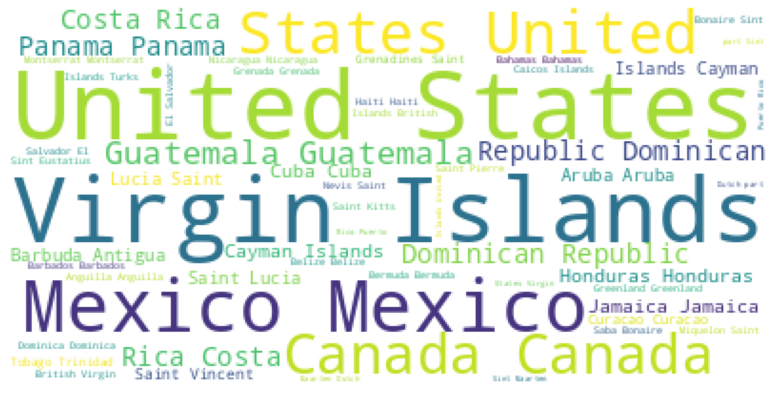

In [474]:
#checking location
from wordcloud import WordCloud

wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(data.location))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [475]:
#sort data by date
data.sort_values(by='date', inplace = True) 
data.head(5)

,iso_code,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases_per_million,new_cases_smoothed,new_deaths_per_million,icu_patients,date
149732,MEX,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
149733,MEX,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-02
149734,MEX,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-03
149735,MEX,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-04
149736,MEX,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-05


In [476]:
data.tail(5)

,iso_code,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases_per_million,new_cases_smoothed,new_deaths_per_million,icu_patients,date
157124,MSR,Montserrat,NaN,NaN,NaN,317924.315,0.000,0.0,NaN,2023-03-06
7692,AIA,Anguilla,NaN,NaN,NaN,245890.282,0.000,0.0,NaN,2023-03-06
197546,KNA,Saint Kitts and Nevis,NaN,NaN,NaN,138356.998,0.143,0.0,NaN,2023-03-06
150892,MEX,Mexico,NaN,NaN,NaN,58591.464,NaN,0.0,NaN,2023-03-06
65437,DOM,Dominican Republic,NaN,NaN,NaN,58840.104,NaN,0.0,NaN,2023-03-06


In [477]:
print('Data point starts from ',data.date.min(),'n')
print('Data point ends at ',data.date.max(),'n')

Data point starts from  2020-01-01 00:00:00 n
Data point ends at  2023-03-06 00:00:00 n


Dates go from January 2020 to February 2023

29th March 2022 stopped keeping track of vaccinations


In [478]:
#removing rows that only have NaN values
df2=data.dropna(thresh=4)


Rows that only have NaN values for 'total_vaccinations', people_vaccinated' ,'people_fully_vaccinated', 'new_deaths_per_million','new_cases_smoothed' were dropped. Additionally, NaN values were replaced by 0.

In [479]:
# Replacing our NaN values with 0
clean_df= data
clean_df[['total_vaccinations', 'people_vaccinated', 
          'people_fully_vaccinated', 'new_deaths_per_million', 
          'new_cases_smoothed']] = clean_df[['total_vaccinations', 
                                             'people_vaccinated', 
                                             'people_fully_vaccinated', 
                                             'new_deaths_per_million',
                                             'new_cases_smoothed']].fillna(0)


,iso_code,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases_per_million,new_cases_smoothed,new_deaths_per_million,icu_patients,date
149732,MEX,Mexico,0.0,0.0,0.0,NaN,0.000,0.0,NaN,2020-01-01
149733,MEX,Mexico,0.0,0.0,0.0,NaN,0.000,0.0,NaN,2020-01-02
149734,MEX,Mexico,0.0,0.0,0.0,NaN,0.000,0.0,NaN,2020-01-03
149735,MEX,Mexico,0.0,0.0,0.0,NaN,0.000,0.0,NaN,2020-01-04
149736,MEX,Mexico,0.0,0.0,0.0,NaN,0.000,0.0,NaN,2020-01-05
...,...,...,...,...,...,...,...,...,...,...
157124,MSR,Montserrat,0.0,0.0,0.0,317924.315,0.000,0.0,NaN,2023-03-06
7692,AIA,Anguilla,0.0,0.0,0.0,245890.282,0.000,0.0,NaN,2023-03-06
197546,KNA,Saint Kitts and Nevis,0.0,0.0,0.0,138356.998,0.143,0.0,NaN,2023-03-06
150892,MEX,Mexico,0.0,0.0,0.0,58591.464,0.000,0.0,NaN,2023-03-06


In [480]:
#creating month_year
clean_df['month_year'] = clean_df['date'].dt.strftime('%b-%Y')
clean_df = clean_df.set_index('month_year') 

clean_df = clean_df.drop(['date'], axis=1)

clean_df.head()

,iso_code,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases_per_million,new_cases_smoothed,new_deaths_per_million,icu_patients
month_year,,,,,,,,,
Jan-2020,MEX,Mexico,0.0,0.0,0.0,NaN,0.0,0.0,NaN
Jan-2020,MEX,Mexico,0.0,0.0,0.0,NaN,0.0,0.0,NaN
Jan-2020,MEX,Mexico,0.0,0.0,0.0,NaN,0.0,0.0,NaN
Jan-2020,MEX,Mexico,0.0,0.0,0.0,NaN,0.0,0.0,NaN
Jan-2020,MEX,Mexico,0.0,0.0,0.0,NaN,0.0,0.0,NaN


In [481]:
print (clean_df.dtypes)

iso_code                    object
location                    object
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
total_cases_per_million    float64
new_cases_smoothed         float64
new_deaths_per_million     float64
icu_patients               float64
dtype: object


In [482]:
#grouping data by country and month & year
data_grouped= clean_df.groupby(['location', 'iso_code', 'month_year']).agg({"total_vaccinations":"max",
                                                            "people_vaccinated":"max",
                                                            "people_fully_vaccinated":"max", 
                                                            "total_cases_per_million":"max",
                                                            'new_deaths_per_million':"sum",
                                                            'new_cases_smoothed':'sum'})

data_grouped.head()

total_vaccinations  people_vaccinated  \
location iso_code month_year                                          
Anguilla AIA      Apr-2020                   0.0                0.0   
                  Apr-2021                6898.0             6115.0   
                  Apr-2022               23126.0            10622.0   
                  Aug-2020                   0.0                0.0   
                  Aug-2021               18458.0             9493.0   

                              people_fully_vaccinated  \
location iso_code month_year                            
Anguilla AIA      Apr-2020                        0.0   
                  Apr-2021                      783.0   
                  Apr-2022                     9874.0   
                  Aug-2020                        0.0   
                  Aug-2021                     8965.0   

                              total_cases_per_million  new_deaths_per_million  \
location iso_code month_year                                                    
Anguilla AIA      Apr-2020                    188.953                     0.0   
                  Apr-2021                   5857.530                     0.0   
                  Apr-2022                 175599.924                     0.0   
                  Aug-2020                    188.953                     0.0   
                  Aug-2021                  13667.569                     0.0   

                              new_cases_smoothed  
location iso_code month_year                      
Anguilla AIA      Apr-2020                 1.573  
                  Apr-2021                55.857  
                  Apr-2022               100.431  
                  Aug-2020                 0.000  
                  Aug-2021                85.715

In [483]:
data_grouped.sort_values(by='month_year', inplace = True) 
data_grouped.head(5)

,,,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases_per_million,new_deaths_per_million,new_cases_smoothed
location,iso_code,month_year,,,,,,
Anguilla,AIA,Apr-2020,0.0,0.0,0.0,188.953,0.000,1.573
Antigua and Barbuda,ATG,Apr-2020,0.0,0.0,0.0,255.940,31.992,17.571
Puerto Rico,PRI,Apr-2020,0.0,0.0,0.0,NaN,0.000,0.000
Panama,PAN,Apr-2020,0.0,0.0,0.0,1481.656,35.839,5153.572
Nicaragua,NIC,Apr-2020,0.0,0.0,0.0,1.871,0.288,9.435


In [484]:
data_grouped.shape

(1341, 6)

In [485]:
#moving index to columns
data_grouped = data_grouped.reset_index()

In [486]:
data_grouped.dtypes

location                    object
iso_code                    object
month_year                  object
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
total_cases_per_million    float64
new_deaths_per_million     float64
new_cases_smoothed         float64
dtype: object

In [487]:
#turning month_year into a datetime variable
data_grouped.month_year = pd.to_datetime(data_grouped.month_year)

In [488]:
#cheching if it worked
data_grouped.dtypes

location                           object
iso_code                           object
month_year                 datetime64[ns]
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
total_cases_per_million           float64
new_deaths_per_million            float64
new_cases_smoothed                float64
dtype: object

# DESCRIPTION AND VISUALISATION OF THE DATA




In [489]:
import altair as alt
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import fixed

In [490]:
#cheching if the chart works
chart1= alt.Chart(data_grouped).mark_point().encode(
      x=alt.X('month_year:T', title='Time'),
      y=alt.Y('total_vaccinations:Q',title='Total vaccinations count'),
      tooltip=['location', 'total_vaccinations'],
      color='location'
).properties(title='Covid vaccinations over time - all countries'
)
chart1

alt.Chart(...)

In [491]:
def select_country_data(iso_code, df):
   return df.loc[df['iso_code'] == iso_code, ]

In [492]:
def visualize_country_data(iso_code, df):
  
  country_data = select_country_data(iso_code, df)

  chart= alt.Chart(country_data).mark_point().encode(
      x=alt.X('month_year:T', title='Time', sort='ascending'),
      y=alt.Y('total_vaccinations:Q',title='Total vaccinations count'),
      tooltip=['location', 'total_vaccinations'],
  ).properties(title='Covid vaccinations over time per country'
  )
  display(chart)

In [493]:
all_iso_codes=clean_df['iso_code'].unique()
all_iso_codes

array(['MEX', 'USA', 'CAN', 'GTM', 'DOM', 'PRI', 'CRI', 'PAN', 'JAM',
       'HND', 'CUB', 'ATG', 'ABW', 'CYM', 'CUW', 'LCA', 'TTO', 'VCT',
       'BHS', 'GRL', 'BRB', 'MSR', 'SLV', 'BMU', 'NIC', 'HTI', 'DMA',
       'GRD', 'BLZ', 'VIR', 'KNA', 'AIA', 'VGB', 'TCA', 'BES', 'SPM',
       'SXM'], dtype=object)

In [494]:
chart2=interact(visualize_country_data, iso_code= all_iso_codes, df=fixed(clean_df)); 
chart2

interactive(children=(Dropdown(description='iso_code', options=('MEX', 'USA', 'CAN', 'GTM', 'DOM', 'PRI', 'CRI…

<function __main__.visualize_country_data(iso_code, df)>

In [495]:
#cheking if the chart works
chart1= alt.Chart(data_grouped).mark_point().encode(
      x=alt.X('month_year:T', title='Time'),
      y=alt.Y('total_vaccinations:Q',title='Total vaccinations count'),
      tooltip=['location', 'total_vaccinations'],
      color='new_deaths_per_million'
).properties(title='Covid vaccinations over time - all countries'
)
chart1

alt.Chart(...)

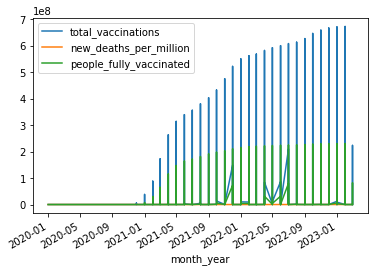

In [496]:
import matplotlib.pyplot as plt
data_grouped.plot(x="month_year", y=['total_vaccinations','new_deaths_per_million','people_fully_vaccinated'])
plt.show()

In [497]:
base = alt.Chart(data_grouped).encode(
    alt.X('month_year:T', axis=alt.Axis(title='Time'))
).properties(title='Covid vaccinations & new deaths over time - North America')


line1 = base.mark_line(stroke='#57A44C', interpolate='monotone').encode(
    alt.Y('total_vaccinations',
          axis=alt.Axis(title=' Total vaccinations', titleColor='#57A44C'))
)

line2 = base.mark_line(stroke='#5276A7', interpolate='monotone').encode(
    alt.Y('new_deaths_per_million',
          axis=alt.Axis(title='New deaths per million', titleColor='#5276A7'))
)


alt.layer(line1, line2).resolve_scale(
    y = 'independent'
)



alt.LayerChart(...)

*Observe:* except for certain otliers were  new deaths per million and new cases spiked, there is a decreasing trend with increasing covid vaccination counts. 

In [498]:
base = alt.Chart(data_grouped).encode(
    alt.X('month_year:T', axis=alt.Axis(title='Time'))
).properties(title='Covid vaccinations & new cases over time - North America')


line1 = base.mark_line(stroke='#57A44C', interpolate='monotone').encode(
    alt.Y('total_vaccinations',
          axis=alt.Axis(title=' Total vaccinations', titleColor='#57A44C'))
)

line2 = base.mark_line(stroke='#5276A7', interpolate='monotone').encode(
    alt.Y('new_cases_smoothed',
          axis=alt.Axis(title='New cases (smoothed)', titleColor='#5276A7'))
)


alt.layer(line1, line2).resolve_scale(
    y = 'independent'
)


alt.LayerChart(...)

Let's observe the total case per million trend with increasing vaccinatio  count:

In [499]:
base = alt.Chart(data_grouped).encode(x='month_year:O').properties(title='Total vaccinations & new cases over time - North America')

bar = base.mark_bar().encode(y='total_vaccinations:Q')

line =  base.mark_line(color='red').encode(
    y='total_cases_per_million:Q'
)

(bar + line).properties(width=600)

alt.LayerChart(...)

And here is the progression of total cases per million on it's own. Note how it suddedly shows more variation than when plotted with increasing vaccination count.

In [500]:
base = alt.Chart(data_grouped).encode(x='month_year:O')

bar = base.mark_bar().encode(y='total_cases_per_million:Q')
(bar).properties(width=600)

alt.Chart(...)

Let's represent the progression of new_deaths_per million: there a decreasing trend towards later dates.

In [505]:
base = alt.Chart(data_grouped).encode(x='month_year:O')

bar = base.mark_bar().encode(y='new_deaths_per_million:Q')
(bar).properties(width=600)

alt.Chart(...)

In [501]:
#total vaccinated till date
country_wise_total_vaccinated = {}
for location in data_grouped.location.unique() : 
    vaccinated = 0
    for i in range(len(data_grouped)) : 
        if data_grouped.location[i] == location : 
            vaccinated += data_grouped.people_vaccinated[i]
    country_wise_total_vaccinated[location] = vaccinated 
#     made a seperate dict from the df 
    country_wise_total_vaccinated_df = pd.DataFrame.from_dict(country_wise_total_vaccinated,
                                                         orient='index',
                                                         columns = ['total_vaccinated_till_date'])
#     converted dict to df 
country_wise_total_vaccinated_df.sort_values(by = 'total_vaccinated_till_date', ascending = False, inplace = True)
country_wise_total_vaccinated_df

,total_vaccinated_till_date
United States,5.694158e+09
Mexico,1.472306e+09
Canada,7.109598e+08
Cuba,2.137692e+08
Dominican Republic,1.567927e+08
Guatemala,1.546883e+08
Honduras,1.004899e+08
Nicaragua,9.364179e+07
Costa Rica,7.688898e+07
Panama,6.698329e+07


In [502]:
import plotly.express as px

fig = px.bar(country_wise_total_vaccinated_df, 
             y = 'total_vaccinated_till_date',
             x = country_wise_total_vaccinated_df.index,
             color = 'total_vaccinated_till_date',
             color_discrete_sequence= px.colors.sequential.Viridis_r
            )
fig.update_layout(
    title={
            'text' : "Vaccination till date in various countries",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Countries",
    yaxis_title="Total vaccinated",
    legend_title="Total vaccinated"
)
fig.show()

In [503]:
#vaccination trend in each country
import plotly.express as px

fig = px.line(data_grouped, x = 'month_year', y ='people_vaccinated', color = 'location')
fig.update_layout(
    title={
            'text' : "Monthly vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()

# CONCLUSION

After analyzing the correlation between covid vaccinations and the progression of the covid 19 pandemic in North America, the following can be said:
- the 3 countries with the highest vaccination count were the United states, Mexico and Canada.
- when looking at covid vaccinations and new deaths over time, there is a decreasing trend of new deaths with increasing covid vaccination counts
- when looking at covid vaccinations and new cases, there is a decreasing trend of new cases with increasing covid vaccination counts



In coclusion, it can be said that vaccines did curbe the progression of the covid 19 pandemic in North America.